In [115]:
import pandas as pd
# Load the data
url='https://en.wikipedia.org/wiki/'\
    'Historical_rankings_of_presidents_of_the_United_States'
pres_dfs = pd.read_html(url)

# Select the desired DataFrame
df = pres_dfs[-38]

# Reset the index to start from 1
df.index = range(1, len(df)+1)
print(df)

     Seq.               President        Political party        Bg        Im  \
1       1       George Washington            Independent         7         7   
2       2              John Adams             Federalist         3        14   
3       3        Thomas Jefferson  Democratic-Republican         2         2   
4       4           James Madison  Democratic-Republican         4         6   
5       5            James Monroe  Democratic-Republican         9        15   
6       6       John Quincy Adams  Democratic-Republican         1         9   
7       7          Andrew Jackson             Democratic        38        16   
8       8        Martin Van Buren             Democratic        24        23   
9       9  William Henry Harrison                   Whig  22 (tie)        39   
10     10              John Tyler            Independent        35        34   
11     11           James K. Polk             Democratic        19        10   
12     12          Zachary Taylor       

In [111]:
df.columns

Index(['Seq.', 'President', 'Political party', 'Bg', 'Im', 'Int', 'IQ', 'L',
       'WR', 'AC', 'EAb', 'LA', 'CAb', 'OA', 'PL', 'RC', 'CAp', 'HE', 'EAp',
       'DA', 'FPA', 'AM', 'EV', 'O'],
      dtype='object')

In [116]:
df=(df
#.iloc[1:-1]
.rename(columns={'Political party':'Party'})
.assign(Party = lambda df_: df_
        .Party
        .str.replace(r'\[.*\]','')
        .astype('category'))
)

In [103]:
df.dtypes

Seq.         object
President    object
Party        object
Bg            int64
Im            int64
Int           int64
IQ            int64
L             int64
WR            int64
AC            int64
EAb           int64
LA            int64
CAb           int64
OA            int64
PL            int64
RC            int64
CAp           int64
HE            int64
EAp           int64
DA            int64
FPA           int64
AM            int64
EV            int64
O             int64
dtype: object

In [121]:
# extracting from the copy
import pandas as pd 
url = 'https://github.com/mattharrison/datasets/raw/master/data/siena2018-pres.csv'
df = pd.read_csv(url, index_col=0)
df

,Seq.,President,Party,Bg,Im,Int,IQ,L,WR,AC,...,PL,RC,CAp,HE,EAp,DA,FPA,AM,EV,O
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,18,1,1,1,1,2,2,1,2,1
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,28,17,4,13,15,19,13,16,10,14
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,5,5,7,20,4,6,9,7,5,5
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,9,10,6,14,7,11,19,11,8,7
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,...,12,8,11,9,9,10,5,6,9,8
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,...,29,29,15,17,18,21,15,14,18,18
7,7,Andrew Jackson,Democratic,37,15,29,28,4,4,38,...,6,16,30,25,25,17,23,20,19,19
8,8,Martin Van Buren,Democratic,23,22,27,25,34,28,20,...,16,23,25,31,26,29,27,24,28,25
9,9,William Henry Harrison,Whig,22,38,28,37,44,32,41,...,36,37,42,41,40,42,44,37,39,39
10,10,John Tyler,Independent,34,33,35,34,22,26,37,...,41,40,38,34,36,36,26,32,36,37


In [122]:
def tweak_siena_pres(df):
    def int64_to_uint8(df_):
        # Convert all int64 columns to uint8 for memory efficiency
        cols = df_.select_dtypes('int64')
        return df_.astype({col:'uint8' for col in cols})

    # Process the DataFrame    
    return (df
       .rename(columns={'Seq.':'Seq'})
       .rename(columns={k:v.replace(' ','_') for k, v in 
         {  'Bg' : 'Background',
            'Im' : 'Imagination',
            'Int' :'Integrity',
            'IQ' : 'Intelligence',
            'L': 'Luck',
            'WR' : 'Willing to take risks',
            'AC' : 'Ability to compromise',
            'EAb' :'Executive ability',
            'LA' : 'Leadership ability',
            'CAb' :'Communication ability',
            'OA' : 'Overall ability',
            'PL' : 'Party leadership',
            'RC' : 'Relations with Congress',
            'CAp' :'Court appointments',
            'HE' : 'Handling of economy',
            'EAp' :'Executive appointments',
            'DA' : 'Domestic accomplishments',
            'FPA' :'Foreign policy accomplishments',
            'AM' : 'Avoiding crucial mistakes',
            'EV' : 'Experts view',
            'O': 'Overall'}.items()})
        .astype({'Party':'category'})
        .pipe(int64_to_uint8)
        .assign(Average_rank = lambda df_:(df_.select_dtypes('uint8')
                .sum(axis=1).rank(method='dense').astype('uint8')),
                Quartile= lambda df_:pd.qcut(df_.Average_rank,4,
                   labels = '1st 2nd 3rd 4th'.split())
                   )
           )

In [123]:
result = tweak_siena_pres(df)
print(result)
#df


      Seq               President                  Party  Background  \
1       1       George Washington            Independent           7   
2       2              John Adams             Federalist           3   
3       3        Thomas Jefferson  Democratic-Republican           2   
4       4           James Madison  Democratic-Republican           4   
5       5            James Monroe  Democratic-Republican           9   
6       6       John Quincy Adams  Democratic-Republican           1   
7       7          Andrew Jackson             Democratic          37   
8       8        Martin Van Buren             Democratic          23   
9       9  William Henry Harrison                   Whig          22   
10     10              John Tyler            Independent          34   
11     11           James K. Polk             Democratic          19   
12     12          Zachary Taylor                   Whig          30   
13     13        Millard Fillmore                   Whig        

In [124]:
print(tweak_siena_pres(df).set_index('President').iloc[:, 2:-1])

                        Background  Imagination  Integrity  Intelligence  \
President                                                                  
George Washington                7            7          1            10   
John Adams                       3           13          4             4   
Thomas Jefferson                 2            2         14             1   
James Madison                    4            6          7             3   
James Monroe                     9           14         11            18   
John Quincy Adams                1            9          6             5   
Andrew Jackson                  37           15         29            28   
Martin Van Buren                23           22         27            25   
William Henry Harrison          22           38         28            37   
John Tyler                      34           33         35            34   
James K. Polk                   19           10         23            23   
Zachary Tayl

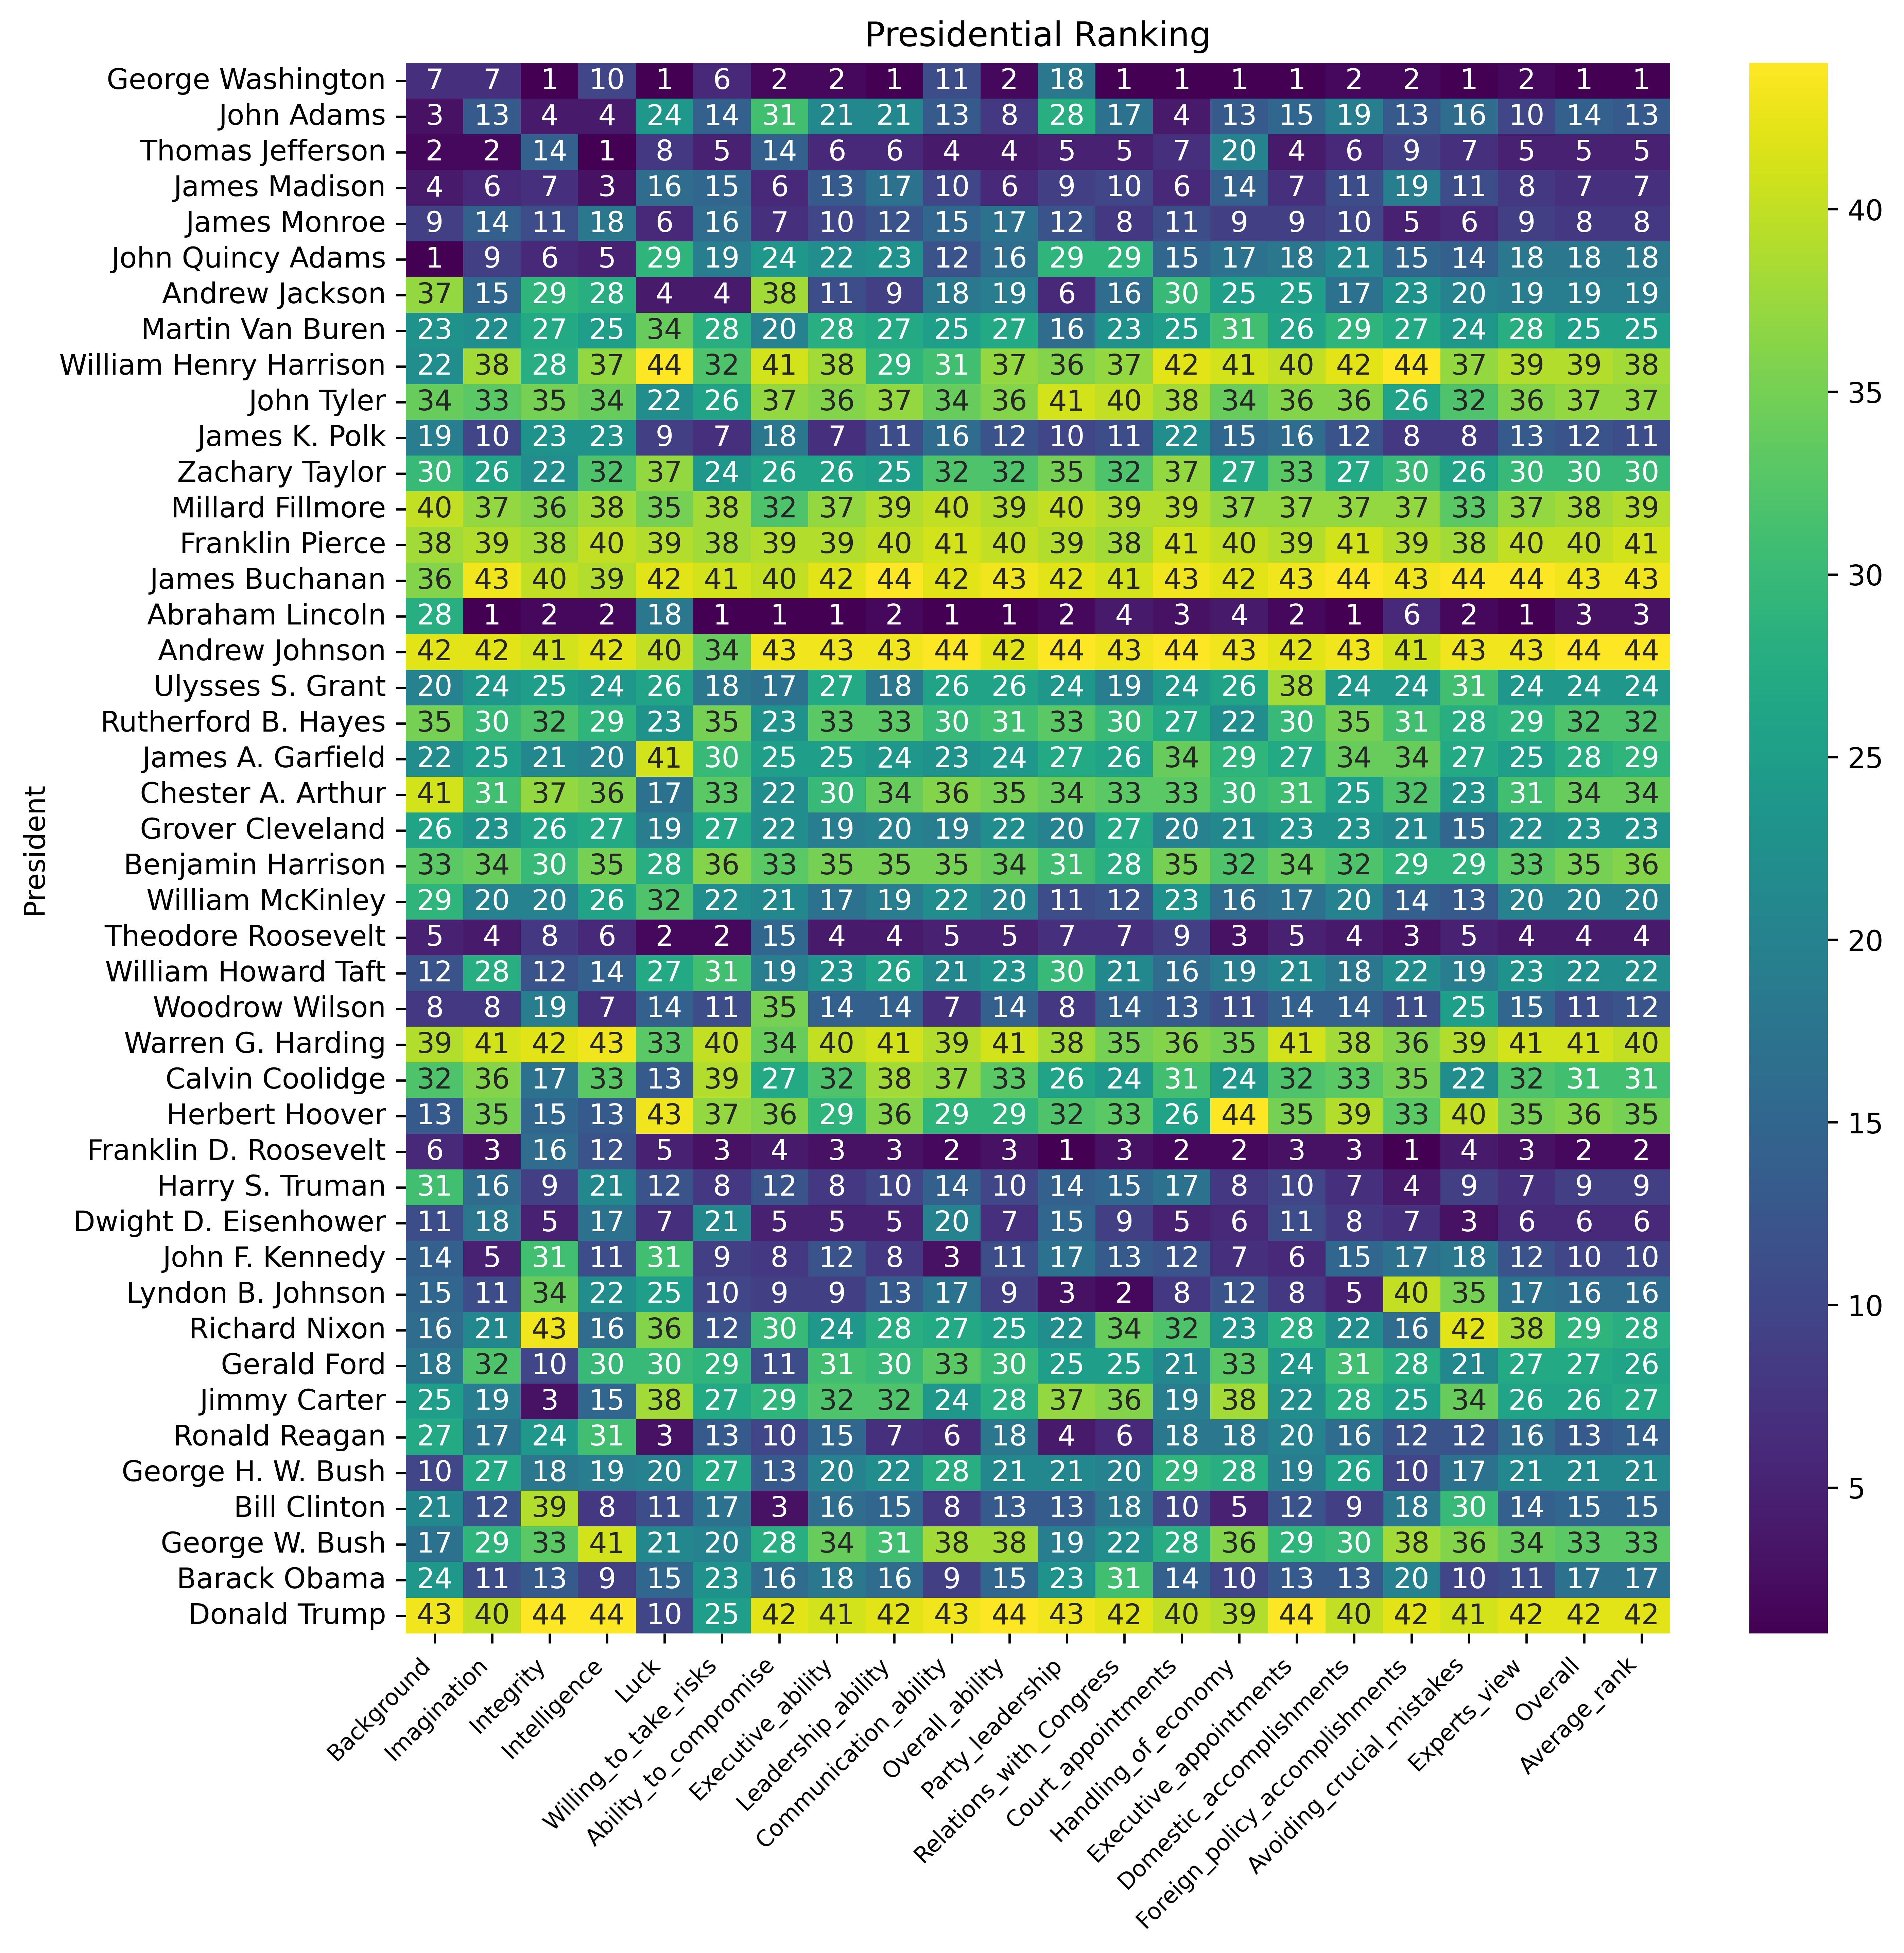

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
fig , ax = plt.subplots(figsize=(10,10), dpi=600)
g = sns.heatmap((tweak_siena_pres(df)
                 .set_index('President')
                 .iloc[:,2:-1]
                ), annot=True, cmap='viridis', ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=45, fontsize=8,
                  ha='right')
_ = plt.title('Presidential Ranking')
fig.savefig('img/pandas2/20-pres.png', bbox_inches='tight')

In [126]:
pres = tweak_siena_pres(df)
pres.head(3)

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoiding_crucial_mistakes,Experts_view,Overall,Average_rank,Quartile
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,7,20,4,6,9,7,5,5,5,1st
